In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import ds_functions as ds

data1 = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('qsar_oral_toxicity.csv', sep=';', decimal='.')

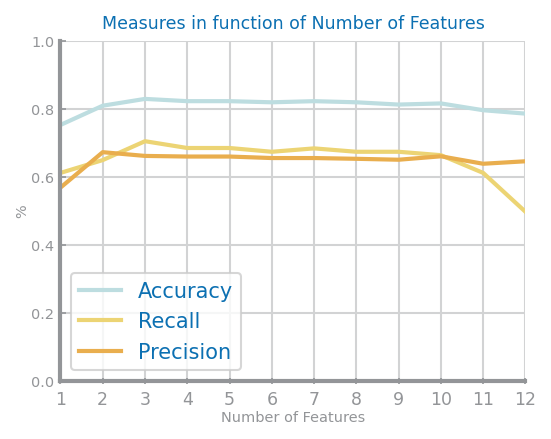

In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

y: np.ndarray = data1.pop(data1.columns[-1]).values
X: np.ndarray = data1.values
labels = pd.unique(y)

nfeatures = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
acc_values = []
rec_values = []
pre_values = []

values = {}
for n in nfeatures:
  # Feature selection
  # clf = KNeighborsClassifier(n_neighbors=3)
  clf = GaussianNB()
  sfs = SequentialFeatureSelector(clf, 
           k_features=n, 
           forward=False, 
           scoring='recall',
           verbose=0
           )
  sfs.fit(X, y)
  Xnew = sfs.transform(X)

  # trnX, tstX, trnY, tstY = train_test_split(Xnew, y, train_size=0.7, stratify=y, random_state=42)
  # clf.fit(trnX, trnY)
  # prdY = clf.predict(tstX)

  # acc_values.append(metrics.accuracy_score(tstY, prdY))
  # rec_values.append(metrics.recall_score(tstY, prdY))
  # pre_values.append(metrics.precision_score(tstY, prdY))

  skf = StratifiedKFold(n_splits=10, random_state=42)
  clf = GaussianNB()
  acc_values.append(sum(cross_val_score(clf, Xnew, y, cv=skf, n_jobs=1))/10)
  rec_values.append(sum(cross_val_score(clf, Xnew, y, cv=skf, n_jobs=1, scoring='recall'))/10)
  pre_values.append(sum(cross_val_score(clf, Xnew, y, cv=skf, n_jobs=1, scoring='precision'))/10)
  
values['Accuracy'] = acc_values
values['Recall'] = rec_values
values['Precision'] = pre_values

ds.multiple_line_chart(nfeatures, values, title='Measures in function of Number of Features',
                           xlabel='Number of Features', ylabel='%', percentage=True)

plt.show()